In [41]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from geometries import *

# These are some geometric test cases 

In [42]:
def benchmark(bez1):
    fix, ax = plt.subplots(figsize=(5,3))
    t=np.linspace(0,1,100)
    ax.plot(bez1.at(t).real, bez1.at(t).imag)

    point=0.6+0.5j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=2+1j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=3.2+1.9j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=1.5+0.39j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    tbb = bez1.tight_bounding_box()
    plot_bb(tbb, ax)
    ax.set_aspect("equal")
    plt.show()

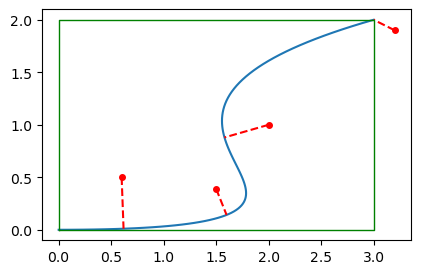

In [43]:
benchmark(Bezier([0+0.j, 4+0.j, -0.5+1j, 3+2j]))

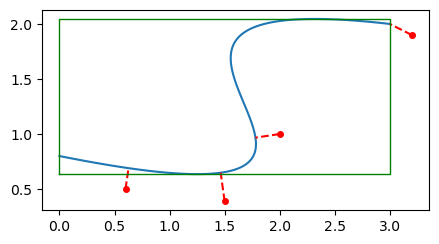

In [44]:
benchmark(Bezier([0+0.8j, 4+0.j, -0.5+2.4j, 3+2j]))

e:\-.-\Projekte\Git\Matcha\geometries.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  ty0 = (-b.imag+np.sqrt(b.imag**2-4*a.imag*c.imag))/(2*a.imag)
e:\-.-\Projekte\Git\Matcha\geometries.py:51: RuntimeWarning: invalid value encountered in double_scalars
  ty1 = (-b.imag-np.sqrt(b.imag**2-4*a.imag*c.imag))/(2*a.imag)


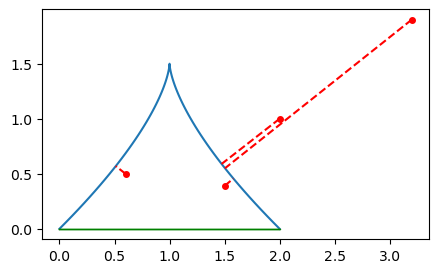

In [45]:
benchmark(Bezier([0+0j, 2+2.j, 0+2j, 2+0j]))

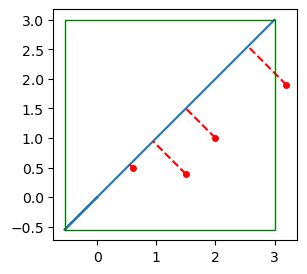

In [32]:
benchmark(Bezier([0+0j, -2-2.j, 2+2j, 3+3j]))

<IPython.core.display.Javascript object>


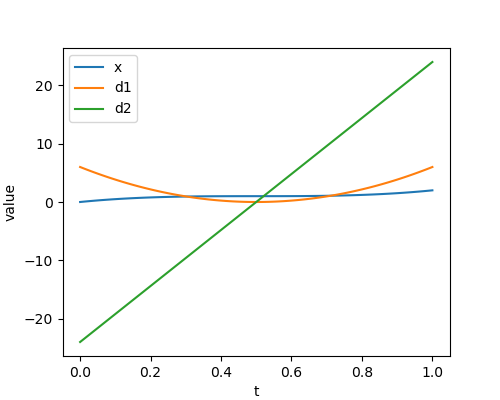

In [175]:
bez = Bezier([0+0j, 2+2.j, 0+2j, 2+0j])

fix, ax = plt.subplots(figsize=(5,4))
t=np.linspace(0,1,100)
ax.plot(t, bez.at(t).real, label="x")

def bez_d1_at(t):
    return bez.points[0]*(-3*t**2+6*t-3)+\
           bez.points[1]*( 9*t**2-12*t+3)+\
           bez.points[2]*(-9*t**2+6*t)+\
           bez.points[3]*( 3*t**2)

def bez_d2_at(t):
    return bez.points[0]*(-6*t+6)+\
           bez.points[1]*(18*t-12)+\
           bez.points[2]*(-18*t+6)+\
           bez.points[3]*(6*t)

ax.plot(t, bez_d1_at(t).real, label="d1")
ax.plot(t, bez_d2_at(t).real, label="d2")



ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("value")
plt.show()


    Does bbox(B1) intersect bbox(B2)?
        No: Return false.
        Yes: Continue.
    Is area(bbox(B1)) + area(bbox(B2)) < threshold?
        Yes: Return true.
        No: Continue.
    Split B1 into B1a and B1b at t = 0.5
    Split B2 into B2a and B2b at t = 0.5
    Return bezInt(B1a, B2a) || bezInt(B1a, B2b) || bezInt(B1b, B2a) || bezInt(B1b, B2b).

This will be fast if the curves don't intersect -- is that the usual case?

In [97]:
bez2 = Bezier([0+0.8j, 4+0.j, -0.5+2.4j, 3+2j])
bez2.tight_bounding_box()
bez2.__dict__

{'points': array([ 0. +0.8j,  4. +0.j , -0.5+2.4j,  3. +2.j ]),
 'coeffs': array([ 16.5-6.j , -25.5+9.6j,  12. -2.4j,   0. +0.8j]),
 'tbb': (0.0, 3.0, 0.6355471487120348, 2.0453417401768546)}

In [98]:
def bb1_cut_bb2(bb1, bb2):
    # returns True if the two bounding boxes intersect
    return not (bb1[1]<bb2[0] or bb2[1]<bb1[0] or bb1[3]<bb2[2] or bb2[3]<bb1[2])

In [99]:
print(bb1_cut_bb2((1,2,1,2), (3,4,3,4)))
print(bb1_cut_bb2((1,3,1,3), (2,4,2,4)))
print(bb1_cut_bb2((2,3,2,3), (1,4,1,4)))
print(bb1_cut_bb2((3,4,3,4), (1,2,1,2)))
print(bb1_cut_bb2((1,2,1,3), (3,4,2,4)))

False
True
True
False
False


# cutting objects into half

In [100]:
-0.5**3+3*0.5**2-3*0.5+1

0.125

In [102]:
3*0.5**3-6*0.5**2+3*0.5

0.375

In [103]:
-3*0.5**3+3*0.5**2

0.375

In [104]:
0.5**3

0.125

De Casteljau's algorithm

In [115]:
def de_casteljau(t, coefs):
    beta = np.array([c for c in coefs]) # values in this list are overridden
    n = len(beta)
    for j in range(1, n):
        for k in range(n - j):
            beta[k] = beta[k] * (1 - t) + beta[k + 1] * t
    return beta

In [116]:
bez = Bezier([0+0.8j, 4+0.j, -0.5+2.4j, 3+2j])

In [117]:
bez.coeffs

array([ 16.5-6.j , -25.5+9.6j,  12. -2.4j,   0. +0.8j])

In [118]:
de_casteljau(0.5, bez.coeffs)

array([-3.   +2.05j, -0.375+1.4j ,  6.   -0.8j ,  0.   +0.8j ])

<IPython.core.display.Javascript object>


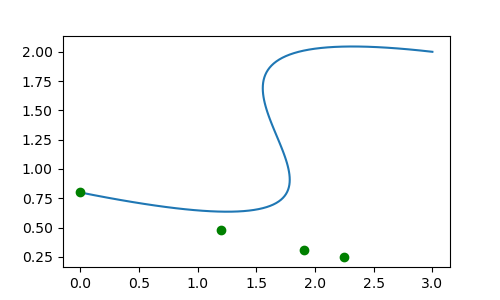

In [122]:
fix, ax = plt.subplots(figsize=(5,3))
t=np.linspace(0,1,100)
ax.plot(bez.at(t).real, bez.at(t).imag)
ax.plot(de_casteljau(0.9, bez.coeffs).real, de_casteljau(0.9, bez.coeffs).imag, "go")
plt.show()

var w = 800, h = 560;

var canvas = document.getElementById("canvas");
var ctx = canvas.getContext("2d");

var pts = [{x:20, y:20},
           {x:20, y:100},
           {x:200, y:100},
           {x:200,  y:20}];
var t = 0.5;

function lerp(a, b, t)
{
    var s = 1 - t;
    return {x:a.x*s + b.x*t,
            y:a.y*s + b.y*t};
}


function splitcurve()
{
    var p0 = pts[0], p1 = pts[1], p2 = pts[2], p3 = pts[3];
    var p4 = lerp(p0, p1, t);
    var p5 = lerp(p1, p2, t);
    var p6 = lerp(p2, p3, t);
    var p7 = lerp(p4, p5, t);
    var p8 = lerp(p5, p6, t);
    var p9 = lerp(p7, p8, t);

    var firsthalf = [p0, p4, p7, p9];
    var secondhalf =  [p9, p8, p6, p3];

    console.log(firsthalf);
    console.log(secondhalf);

In [123]:
bez.points

array([ 0. +0.8j,  4. +0.j , -0.5+2.4j,  3. +2.j ])

In [125]:
def split_bez_half(bez):
    p0, p1, p2, p3 = bez.points
    p4 = 0.5*p0 + 0.5*p1
    p5 = 0.5*p1 + 0.5*p2
    p6 = 0.5*p2 + 0.5*p3
    p7 = 0.5*p4 + 0.5*p5
    p8 = 0.5*p5 + 0.5*p6
    p9 = 0.5*p7 + 0.5*p8
    return Bezier([p0, p4, p7, p9]), Bezier([p9, p8, p6, p3])

In [ ]:
fix, ax = plt.subplots(figsize=(5,3))
t=np.linspace(0,1,100)
ax.plot(bez.at(t).real, bez.at(t).imag)
bez1
plt.show()